In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import seaborn as sns

In [2]:
data = pd.read_csv("house_dataset.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.578570,39.840436,50,4468,1050,2954,958,2.699984,142143.400901,INLAND
1,-116.642167,33.224621,31,2443,271,340,88,2.894406,232202.441844,NEAR BAY
2,-118.480734,35.092228,15,5927,1413,3691,1042,6.305275,500001.000000,NEAR BAY
3,-117.956633,35.337169,33,996,213,3683,1473,9.221680,500001.000000,NEAR BAY
4,-122.040347,36.444281,23,4847,1111,2113,634,5.101452,500001.000000,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
299995,-114.347766,34.423269,12,2644,592,1635,500,7.696457,500001.000000,NEAR BAY
299996,-118.966205,33.369074,2,317,64,554,167,11.023978,448465.434709,INLAND
299997,-117.527564,41.473741,13,6782,687,2548,1021,14.484407,500001.000000,NEAR BAY
299998,-120.798212,35.930266,21,6573,1463,3364,850,1.779708,225086.895461,NEAR OCEAN


In [5]:
data.info()
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   longitude           300000 non-null  float64
 1   latitude            300000 non-null  float64
 2   housing_median_age  300000 non-null  int64  
 3   total_rooms         300000 non-null  int64  
 4   total_bedrooms      300000 non-null  int64  
 5   population          300000 non-null  int64  
 6   households          300000 non-null  int64  
 7   median_income       300000 non-null  float64
 8   median_house_value  300000 non-null  float64
 9   ocean_proximity     300000 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 22.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   longitude 

In [6]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_data = X_train.join(y_train)

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
273600,-119.404379,38.554486,22,4589,790,827,211,14.231062,NONE,500001.000000
59252,-123.644826,34.675127,25,5523,929,2998,997,10.078356,INLAND,464783.878758
189746,-119.243706,35.703864,39,1846,323,1856,657,7.916468,INLAND,325164.930250
3727,-120.864923,41.708488,6,2469,337,1257,465,9.056833,NEAR BAY,500001.000000
275821,-123.339201,40.284815,42,5053,763,4657,1393,14.772514,NEAR BAY,500001.000000
...,...,...,...,...,...,...,...,...,...,...
139333,-122.912722,38.823574,12,894,222,3979,1290,6.698370,NEAR BAY,500001.000000
185598,-122.266919,40.039108,50,783,142,2403,1071,8.768879,NEAR BAY,500001.000000
126346,-123.980285,42.087912,22,3366,411,2188,578,3.311405,NEAR BAY,500001.000000
272379,-122.545720,34.955962,48,6141,952,3097,827,13.666357,NEAR BAY,500001.000000


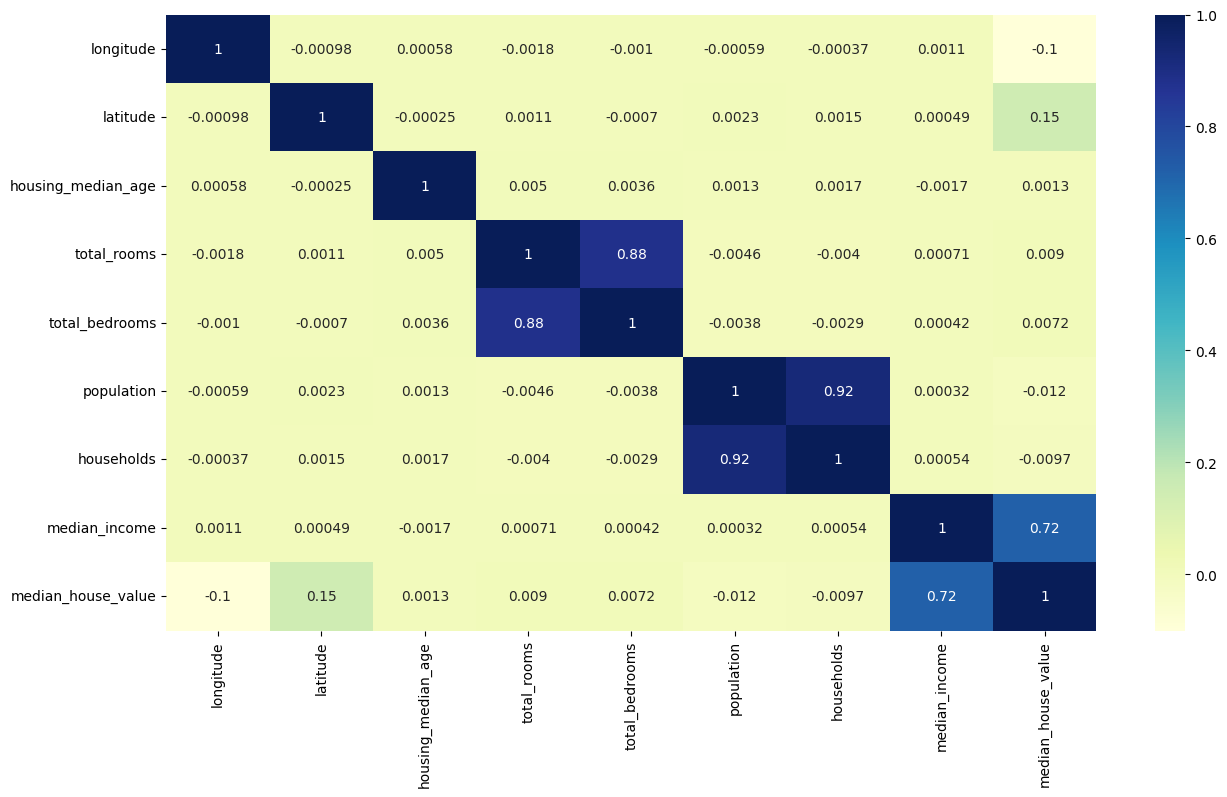

In [7]:
train_data = X_train.join(y_train) # the result of this only shows the result of the training data

train_data_numeric = train_data.drop(columns=['ocean_proximity'])

plt.figure(figsize=(15,8))
sns.heatmap(train_data_numeric.corr(), annot=True, cmap="YlGnBu")
plt.show()
#======= END OF DATA EXPLORATION ========#

In [8]:
pd.get_dummies(train_data.ocean_proximity)
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,NONE
273600,-119.404379,38.554486,22,4589,790,827,211,14.231062,500001.000000,False,False,False,False,True
59252,-123.644826,34.675127,25,5523,929,2998,997,10.078356,464783.878758,True,False,False,False,False
189746,-119.243706,35.703864,39,1846,323,1856,657,7.916468,325164.930250,True,False,False,False,False
3727,-120.864923,41.708488,6,2469,337,1257,465,9.056833,500001.000000,False,False,True,False,False
275821,-123.339201,40.284815,42,5053,763,4657,1393,14.772514,500001.000000,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139333,-122.912722,38.823574,12,894,222,3979,1290,6.698370,500001.000000,False,False,True,False,False
185598,-122.266919,40.039108,50,783,142,2403,1071,8.768879,500001.000000,False,False,True,False,False
126346,-123.980285,42.087912,22,3366,411,2188,578,3.311405,500001.000000,False,False,True,False,False
272379,-122.545720,34.955962,48,6141,952,3097,827,13.666357,500001.000000,False,False,True,False,False


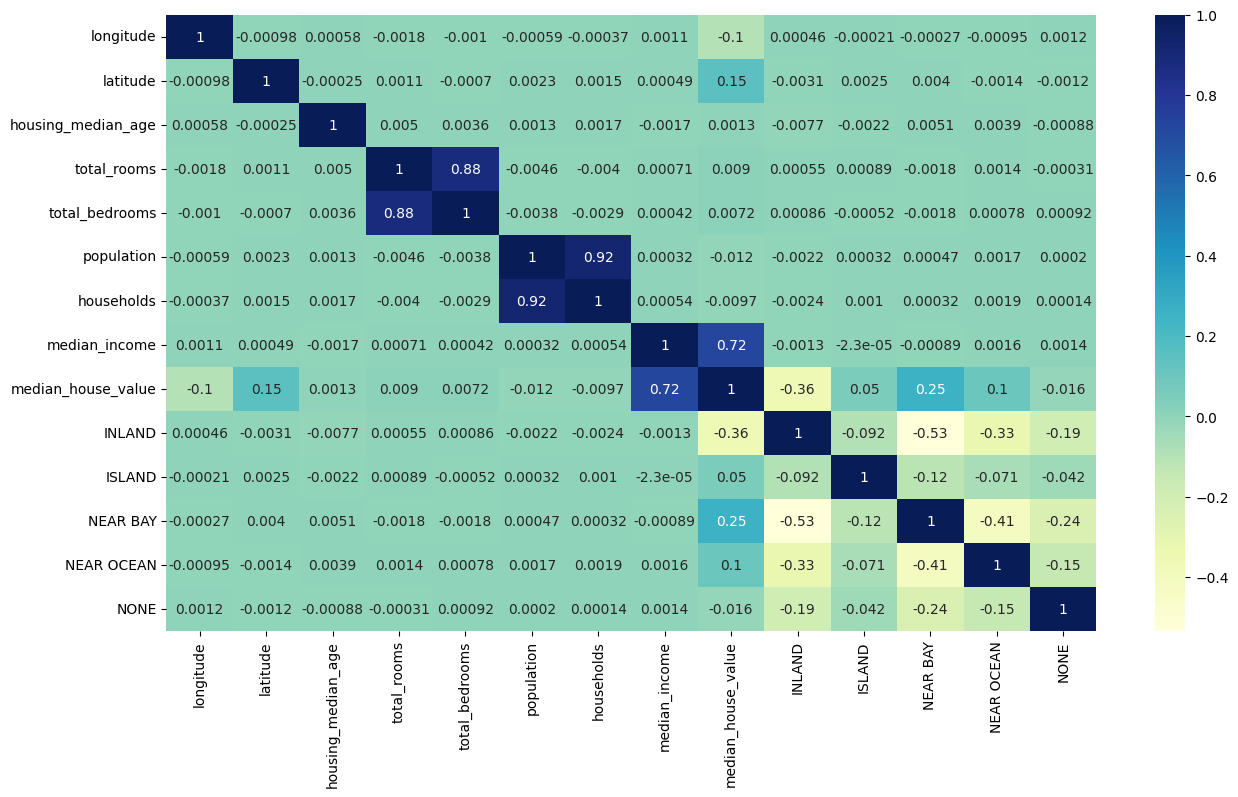

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

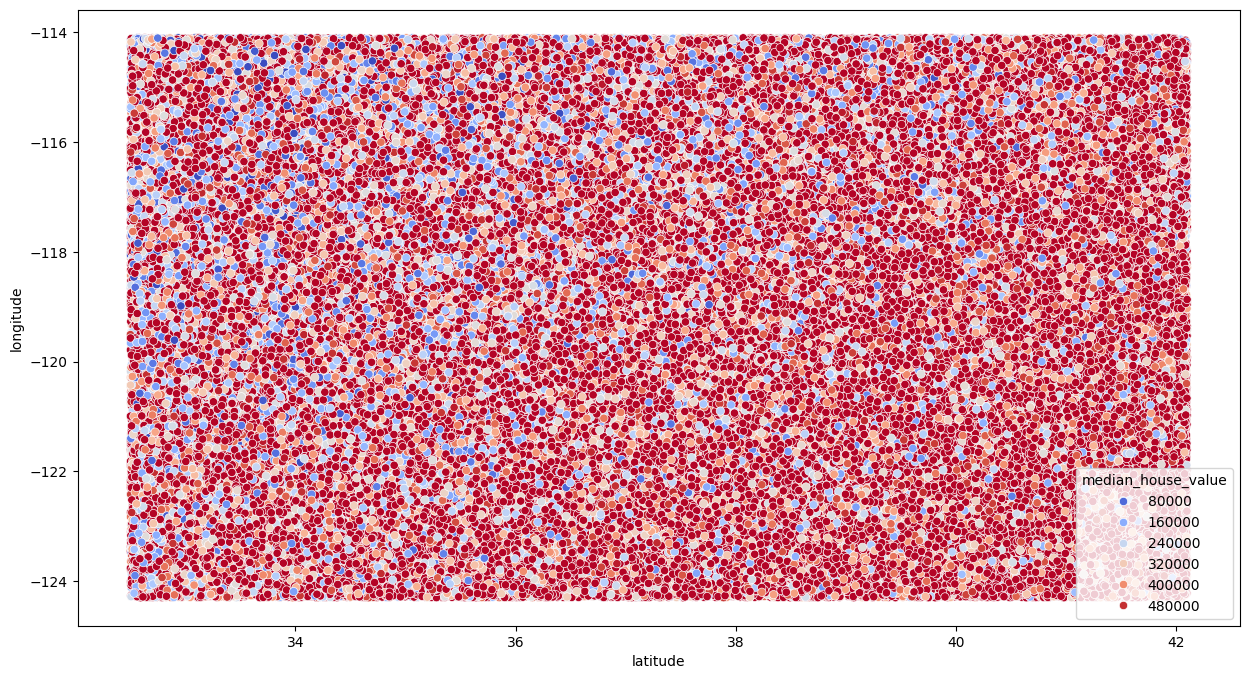

In [10]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=train_data.latitude, y=train_data.longitude, hue=train_data.median_house_value, palette="coolwarm")

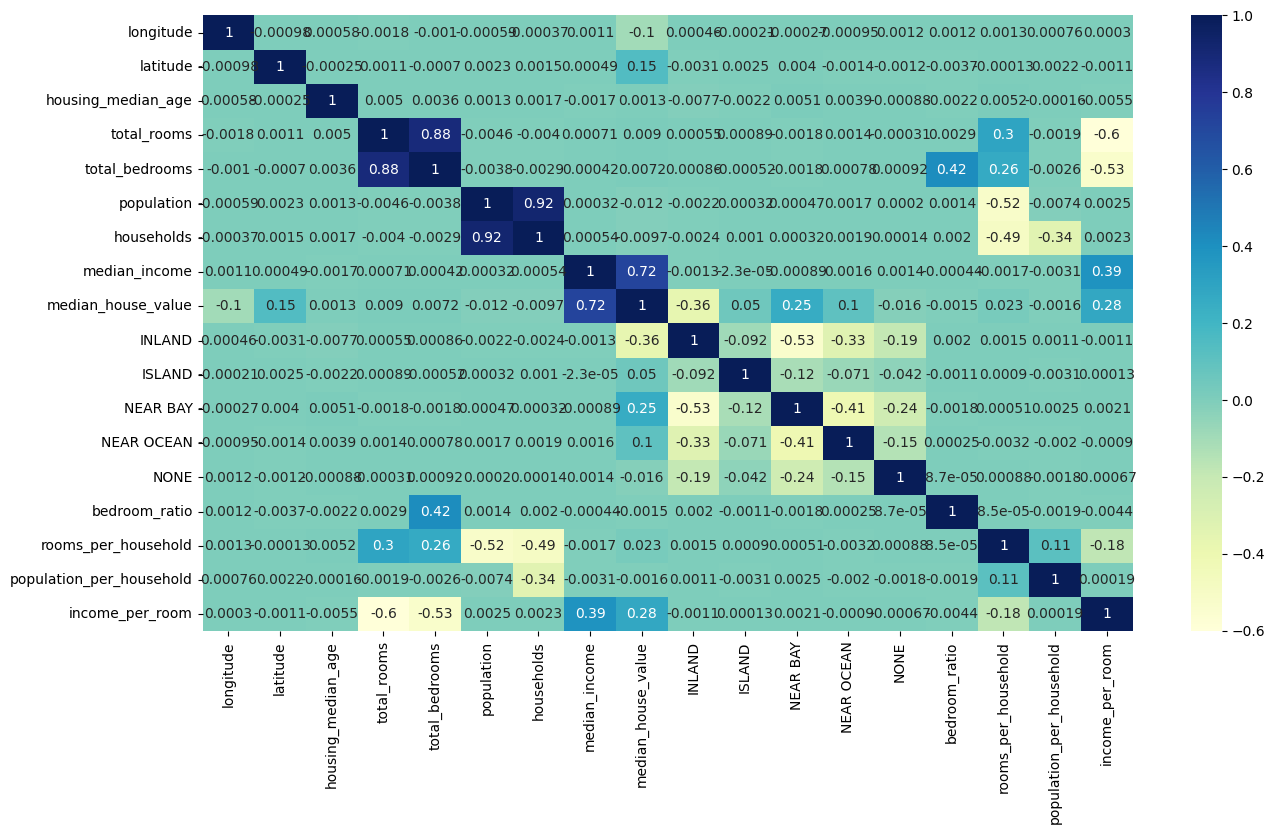

In [11]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['rooms_per_household'] = train_data['total_rooms'] / train_data['households']
train_data['population_per_household'] = train_data['population'] / train_data['households']
train_data['income_per_room'] = train_data['median_income'] / train_data['total_rooms']

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()